In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


## Load the cleaned dataset

In [24]:
di = pd.read_csv('diabetes_cleaned.csv')

In [25]:
di.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [26]:
di.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Splitting the Dataset
##### now that we have transformed the data we need to split the dataset in two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically we are going to use the first part to train the model (ignoring the column with the pre assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre assigned label.

In [27]:
# Split the training dataset in 80% / 20%
from sklearn.model_selection import train_test_split

X = di.drop('Outcome', axis=1)
Y = di['Outcome']


x_train ,x_test , y_train ,  y_test = train_test_split(X,Y, test_size=0.20 ) 

In [28]:
x_train.shape , y_train.shape

((614, 8), (614,))

In [29]:
x_test.shape , y_test.shape

((154, 8), (154,))

## Select and train a model


### I've instantiated the Logistic Regression estimator and fit in the training data, along with the training labels to train the model.

#### The algorithm liblinear indicates the kind of optimization that logistic regression performs. Liblinear works very well for smaller datasets like the diabetes dataset.

In [30]:
lg = LogisticRegression (solver='liblinear').fit(x_train , y_train)
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### baseline 

In [31]:
print(" y_test Baseline", 1 - y_test.mean())

 y_test Baseline 0.6688311688311688


## Make a Prediction

In [46]:
y_preds = lg.predict(x_test)
y_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [33]:
pd.Series(y_preds).value_counts()

0    112
1     42
dtype: int64

## Accuracy Score

In [34]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(x_test, y_test)))

    # another ways to know the accuracy 
#accuracy_score(y_test, y_preds)
#model_score = lg.score(x_test , y_test)
#print(model_score)

Accuracy of logistic regression classifier on test set: 0.79


## Probabilities

In [35]:
di["predicted_outcome"] = lg.predict(di[x_train.columns])

di = pd.concat([di, pd.DataFrame(lg.predict_proba(di[x_train.columns]))], 
                 axis = 1)

In [36]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [37]:
di.head(10).style.apply(highlight_max, axis=1, subset=[0, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predicted_outcome,0,1
0,6,148,72,35,219.028,33.6,0.627,50,1,1,0.334487,0.665513
1,1,85,66,29,70.3416,26.6,0.351,31,0,0,0.910168,0.0898321
2,8,183,64,32,270.573,23.3,0.672,32,1,1,0.21173,0.78827
3,1,89,66,23,94,28.1,0.167,21,0,0,0.91402,0.0859798
4,0,137,40,35,168,43.1,2.288,33,1,1,0.124631,0.875369
5,5,116,74,32,127.84,25.6,0.201,30,0,0,0.797533,0.202467
6,3,78,50,32,88,31,0.248,26,1,0,0.835061,0.164939
7,10,115,72.4052,32,136.57,35.3,0.134,29,0,0,0.558214,0.441786
8,2,197,70,45,543,30.5,0.158,53,1,1,0.202166,0.797834
9,8,125,96,32,155.571,32,0.232,54,1,0,0.677315,0.322685


In [38]:
di[['Outcome', 'predicted_outcome']].head(10).assign(Equal = di['Outcome'] == di.predicted_outcome)

,Outcome,predicted_outcome,Equal
0,1,1,True
1,0,0,True
2,1,1,True
3,0,0,True
4,1,1,True
5,0,0,True
6,1,0,False
7,0,0,True
8,1,1,True
9,1,0,False


## Confusion Matrix

In [50]:
TN = cm[0, 0]; print("True Negatives:", TN)
TP = cm[1, 1]; print("True Positives:", TP)
FP = cm[0, 1]; print("False Positives:", FP)
FN = cm[1, 0]; print("False Negatives:", FN)

True Negatives: 91
True Positives: 30
False Positives: 12
False Negatives: 21


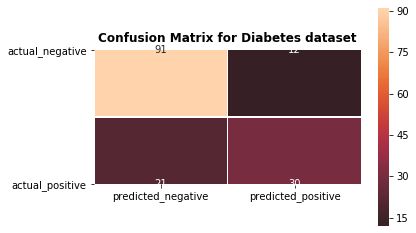

In [49]:
from sklearn.metrics import  confusion_matrix

cm = np.array(confusion_matrix(y_test, y_preds))
cm_lr = pd.DataFrame(cm, index=['actual_negative', 'actual_positive'],
                             columns=['predicted_negative',
 
                                    'predicted_positive']); cm_lr
figsize=(16 , 8) 
plt.title('Confusion Matrix for Diabetes dataset', fontweight='bold', y=1.02)
sns.heatmap(pd.DataFrame(cm_lr), annot=True, square=True, linewidth=0.5, 
            fmt='', center=0)
plt.yticks(rotation=0);


plt.savefig('matrix2.png');

## Classification Report
#### Shows the precision, recall and F1-score of our model.


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.81      0.88      0.85       103
           1       0.71      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



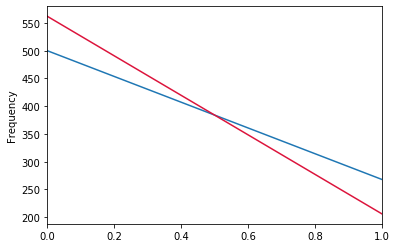

In [42]:
di.Outcome.value_counts().plot()
di.predicted_outcome.value_counts().plot(color='crimson')
plt.ylabel('Frequency');